<a href="https://colab.research.google.com/github/Apricold/Analisis-_catedra_felicidad/blob/main/Analisis_catedra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocesamiento y limpieza de datos#
En esta sección uniremos las diferentes bases de datos, miraremos llaves claves que conecten los registros y filtraremos columnas con el fin de unificar a una sola base de datos

*Importamos librerias*

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
!pip install fitter
from fitter import Fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25608 sha256=39c755db0bd21bb4e289dd211f276943ce4e82a1d2384a0ec70c1fe26882f9e3
  Stored in directory: /root/.cache/pip/wheels/eb/50/1d/6d8762c6a9a50d3668e53f98164ba13ca314827fb5ac7ebeaa
Successfully built fitter


In [2]:
#--------------------------leemos las librerias con las bases de datos -------------------------#
db_sia=pd.read_excel('/content/2023-1S Catedra de la felicidad.xlsx',sheet_name='Hoja1')
db_fin=pd.read_excel('/content/Registro de resultados final Cátedra de Bienestar y Felicidad (respuestas).xlsx')
db_ini=pd.read_excel('/content/Registro de resultados inicio Cátedra de Bienestar y Felicidad (respuestas).xlsx')

*Miraremos la informacion de la base de datos al inicio de la catedra y al final de la catedra*

In [3]:
#------------------comparamos las columnas de  resultados de inicio de catedra con final de catedra------------#
print('Informacion resultados inicio:\n')
print(db_ini.info())
print('-------------------------------------------------------------------')
print('Informacion resultados final:\n')
print(db_fin.info())

Informacion resultados inicio:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 17 columns):
 #   Column                                                                                                          Non-Null Count  Dtype         
---  ------                                                                                                          --------------  -----         
 0   Marca temporal                                                                                                  49 non-null     datetime64[ns]
 1   Dirección de correo electrónico                                                                                 49 non-null     object        
 2   NOMBRE                                                                                                          49 non-null     object        
 3   APELLIDOS                                                                                                       49 non-n

*Dado que compartimos el mismo nombre de variables pero en diferentes tiempos(inicio-final) procederemos a denotar en que tiempo se obtuvo cada variable*

In [4]:
if 'Test de Fortalezas VIA: Enumera por favor en orden jerárquico las 4 primeras fortalezas que te arrojó el Test.' in db_ini.columns:
  db_ini.drop(columns=['Test de Fortalezas VIA: Enumera por favor en orden jerárquico las 4 primeras fortalezas que te arrojó el Test.'],inplace=True)
col_ini=db_ini.columns
# col_ini.append(db_fin.columns)
#agregamos 'final'e 'inicio' en los resultados de cada base de datos
for i in db_fin.columns[6:16]:
  db_fin.is_copy = False
  db_ini.is_copy = False
  db_fin.rename(columns={i:i+'_final'},inplace=True)
  db_ini.rename(columns={i:i+'_inicio'},inplace=True)
db_fin.drop(db_fin.columns[17:],inplace=True,axis=1)
print(f'las columnas iniciales seran las siguientes:\n{db_ini.columns.values}')
print(f'las columnas finales seran las siguientes:\n {db_fin.columns.values}')

las columnas iniciales seran las siguientes:
['Marca temporal' 'Dirección de correo electrónico' 'NOMBRE' 'APELLIDOS'
 'CARRERA' 'GRUPO' 'Test: Felicidad Auténtica_inicio'
 'Emociones positivas_inicio' 'Compromiso_inicio' 'Relaciones_inicio'
 'Sentido_inicio' 'Logro_inicio' 'Salud_inicio'
 'Emociones negativas_inicio' 'Soledad_inicio' 'Bienestar General_inicio']
las columnas finales seran las siguientes:
 ['Marca temporal' 'Dirección de correo electrónico' 'NOMBRE' 'APELLIDOS'
 'CARRERA' 'GRUPO' 'Test: Felicidad Auténtica_final'
 'Emociones positivas_final' 'Compromiso_final' 'Relaciones_final'
 'Sentido_final' 'Logro_final' 'Salud_final' 'Emociones negativas_final'
 'Soledad_final' 'Bienestar General_final'
 'En una escala del 1 al 10, ¿qué tan satisfecho/a estás con la cátedra de felicidad en general?']


*Miraremos la base de datos  del sia para mirar que tipo de informacion tenemos*

In [5]:
db_sia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 91 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   PERIODO                       55 non-null     object        
 1   PERIODO_BIENESTAR             55 non-null     object        
 2   COD_SEDE                      55 non-null     int64         
 3   SEDE                          55 non-null     object        
 4   COD_FACULTAD                  55 non-null     int64         
 5   FACULTAD                      55 non-null     object        
 6   COD_PROGRAMA_CURRICULAR       55 non-null     int64         
 7   PROGRAMA_CURRICULAR           55 non-null     object        
 8   COD_UAB                       55 non-null     int64         
 9   UAB                           55 non-null     object        
 10  COD_PLAN                      55 non-null     int64         
 11  PLAN                          55 n

*Utilizaremos como key entre las 3 bases de datos el correo personal de cada estudiante con el fin de concatenar la informacion en una sola base de datos*

*Primero Paso: Uniremos las 2 bases de datos de los resultados iniciales y finales*

In [6]:
db_fin.sort_values('NOMBRE',inplace=True)
db_ini.sort_values('NOMBRE',inplace=True)
db_ini['Dirección de correo electrónico']=db_ini['Dirección de correo electrónico'].str.lower()
db_fin['Dirección de correo electrónico']=db_fin['Dirección de correo electrónico'].str.lower()
a=db_ini[db_ini['Dirección de correo electrónico'].isin(db_fin['Dirección de correo electrónico'])]['Dirección de correo electrónico'].values
# print(a,len(a))
b=db_ini[~db_ini['Dirección de correo electrónico'].isin(db_fin['Dirección de correo electrónico'])]['Dirección de correo electrónico'].values
print('Correos de estudiantes  que hicieron la prueba inicial y NO la final \n')
print(b,len(b))

Correos de estudiantes  que hicieron la prueba inicial y NO la final 

['jvivasd@unal.edu.co' 'luboteroa@unal.edu.co' 'mbeltranba@unal.edu.co'
 'ohernandez@unal.edu.co'] 4


In [7]:
a=db_fin[db_fin['Dirección de correo electrónico'].isin(db_ini['Dirección de correo electrónico'])]['Dirección de correo electrónico'].values
# print(a,len(a))
b=db_fin[~db_fin['Dirección de correo electrónico'].isin(db_ini['Dirección de correo electrónico'])]['Dirección de correo electrónico'].values
print('Correos de estudiantes  que hicieron la prueba final y NO la inicial \n')
print(b,len(b))

Correos de estudiantes  que hicieron la prueba final y NO la inicial 

['juriveragi@unal.edu.co' 'jumendezf@unal.edu.co' 'jricoo@unal.edu.co'
 'lnorena@unal.edu.co'] 4


In [8]:
#quitamos el nombre apellido carrera y grupo de una de las bases de datos ya que son valores repetidos en ambas
db_ini.drop(columns=['NOMBRE','APELLIDOS','CARRERA','GRUPO','Marca temporal'],inplace=True)
db_fin.drop(columns=['NOMBRE','APELLIDOS','CARRERA','GRUPO','Marca temporal'],inplace=True)
bd_resultados_un=db_fin.merge(db_ini,left_on='Dirección de correo electrónico',right_on='Dirección de correo electrónico',how='inner')
print('Informacion de la base de datos de los resultados unida:\n')
bd_resultados_un.info()

Informacion de la base de datos de los resultados unida:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Data columns (total 22 columns):
 #   Column                                                                                          Non-Null Count  Dtype 
---  ------                                                                                          --------------  ----- 
 0   Dirección de correo electrónico                                                                 45 non-null     object
 1   Test: Felicidad Auténtica_final                                                                 45 non-null     object
 2   Emociones positivas_final                                                                       45 non-null     object
 3   Compromiso_final                                                                                45 non-null     object
 4   Relaciones_final                                                                          

In [9]:
bd_resultados_un.head()

,Dirección de correo electrónico,Test: Felicidad Auténtica_final,Emociones positivas_final,Compromiso_final,Relaciones_final,Sentido_final,Logro_final,Salud_final,Emociones negativas_final,Soledad_final,...,Test: Felicidad Auténtica_inicio,Emociones positivas_inicio,Compromiso_inicio,Relaciones_inicio,Sentido_inicio,Logro_inicio,Salud_inicio,Emociones negativas_inicio,Soledad_inicio,Bienestar General_inicio
0,alescobarlo@unal.edu.co,Entre 3 y 4,Entre 6 y 9,Entre 6 y 9,Entre 3 y 6,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 3 y 6,Entre 3 y 6,...,Entre 3 y 4,Entre 6 y 9,Entre 6 y 9,Entre 3 y 6,Entre 9 y 10,Entre 6 y 9,Entre 6 y 9,Entre 3 y 6,Entre 6 y 9,Entre 6 y 9
1,aalfonsoa@unal.edu.co,Entre 3 y 4,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 9 y 10,Entre 1 y 3,Entre 3 y 6,...,Entre 2 y 3,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 3 y 6,Entre 6 y 9,Entre 3 y 6,Entre 3 y 6,Entre 6 y 9
2,anmartineza@unal.edu.co,Entre 3 y 4,Entre 6 y 9,Entre 3 y 6,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 3 y 6,Entre 1 y 3,...,Entre 3 y 4,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 1 y 3,Entre 1 y 3,Entre 6 y 9
3,cgutierrezv@unal.edu.co,Entre 2 y 3,Entre 3 y 6,Entre 3 y 6,Entre 9 y 10,Entre 3 y 6,Entre 6 y 9,Entre 9 y 10,Entre 3 y 6,Entre 6 y 9,...,Entre 2 y 3,Entre 6 y 9,Entre 6 y 9,Entre 9 y 10,Entre 3 y 6,Entre 6 y 9,Entre 9 y 10,Entre 6 y 9,Entre 1 y 3,Entre 3 y 6
4,dadiazz@unal.edu.co,Entre 3 y 4,Entre 9 y 10,Entre 6 y 9,Entre 9 y 10,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 1 y 3,Entre 1 y 3,...,Entre 3 y 4,Entre 9 y 10,Entre 6 y 9,Entre 9 y 10,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 1 y 3,Entre 1 y 3,Entre 6 y 9


*filtramos las columnas con mayor importancia de la informacion del sia*

In [10]:

cols=[ 'COD_PROGRAMA_CURRICULAR','NOMBRES','APELLIDO1','APELLIDO2','DOCUMENTO','EDAD','SEXO_LEGAL','CORREO','COD_DEPARTAMENTO_PROCEDENCIA','ESTRATO','PBM','TIPCOLEGIO','PROM_ACADEMICO_ACTUAL']
db_sia=db_sia[cols]
print(f'Columnas que se van a utilizar de la informacion del sia: \n{db_sia.columns.values}')


Columnas que se van a utilizar de la informacion del sia: 
['COD_PROGRAMA_CURRICULAR' 'NOMBRES' 'APELLIDO1' 'APELLIDO2' 'DOCUMENTO'
 'EDAD' 'SEXO_LEGAL' 'CORREO' 'COD_DEPARTAMENTO_PROCEDENCIA' 'ESTRATO'
 'PBM' 'TIPCOLEGIO' 'PROM_ACADEMICO_ACTUAL']


*Segundo paso: Unimos la nueva base de datos de resultados con la informacion del sia*

In [11]:
df_unificada=db_sia.merge(bd_resultados_un,right_on='Dirección de correo electrónico',left_on='CORREO',how='inner')
df_unificada.drop(columns=['Dirección de correo electrónico'],inplace=True)
df_unificada.info()
df_unificada_copy=df_unificada.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Data columns (total 34 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   COD_PROGRAMA_CURRICULAR                                                                         45 non-null     int64  
 1   NOMBRES                                                                                         45 non-null     object 
 2   APELLIDO1                                                                                       45 non-null     object 
 3   APELLIDO2                                                                                       45 non-null     object 
 4   DOCUMENTO                                                                                       45 non-null     int64  
 5   EDAD             

In [12]:
df_unificada.sort_values('CORREO',inplace=True)
df_unificada.head()

,COD_PROGRAMA_CURRICULAR,NOMBRES,APELLIDO1,APELLIDO2,DOCUMENTO,EDAD,SEXO_LEGAL,CORREO,COD_DEPARTAMENTO_PROCEDENCIA,ESTRATO,...,Test: Felicidad Auténtica_inicio,Emociones positivas_inicio,Compromiso_inicio,Relaciones_inicio,Sentido_inicio,Logro_inicio,Salud_inicio,Emociones negativas_inicio,Soledad_inicio,Bienestar General_inicio
1,45,Angel Rafael,Alfonso,Arias,1006531771,21,M,aalfonsoa@unal.edu.co,85,2,...,Entre 2 y 3,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 3 y 6,Entre 6 y 9,Entre 3 y 6,Entre 3 y 6,Entre 6 y 9
2,4,Angela Maria,Lemus,Encinosa,1116555329,24,F,alemuse@unal.edu.co,85,1,...,Entre 2 y 3,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 3 y 6,Entre 6 y 9
0,45,Alejandro,Escobar,Londoño,1053871893,23,M,alescobarlo@unal.edu.co,17,3,...,Entre 3 y 4,Entre 6 y 9,Entre 6 y 9,Entre 3 y 6,Entre 9 y 10,Entre 6 y 9,Entre 6 y 9,Entre 3 y 6,Entre 6 y 9,Entre 6 y 9
3,4,Angie Andrea,Martinez,Agudelo,1002857696,22,F,anmartineza@unal.edu.co,17,2,...,Entre 3 y 4,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 1 y 3,Entre 1 y 3,Entre 6 y 9
4,14,Camilo,Gutierrez,Velasquez,1193373600,21,M,cgutierrezv@unal.edu.co,17,2,...,Entre 2 y 3,Entre 6 y 9,Entre 6 y 9,Entre 9 y 10,Entre 3 y 6,Entre 6 y 9,Entre 9 y 10,Entre 6 y 9,Entre 1 y 3,Entre 3 y 6


#*Analisis Exploratorio de datos (EDA)*#

*En esta sección:*  




1.   *Miraremos las variables categóricas y codificaremos dependiendo si son ordinales o nominales*

2.   *haremos el histograma de nuestra base de datos con el fin de visualizar cada variable*

3.  *Miraremos distribuciones de las variables seleccionada importantes para nuestro clustering*

4. *Escalamos las variables seleccionadas*



In [13]:
df_unificada.dtypes

COD_PROGRAMA_CURRICULAR                                                                             int64
NOMBRES                                                                                            object
APELLIDO1                                                                                          object
APELLIDO2                                                                                          object
DOCUMENTO                                                                                           int64
EDAD                                                                                                int64
SEXO_LEGAL                                                                                         object
CORREO                                                                                             object
COD_DEPARTAMENTO_PROCEDENCIA                                                                        int64
ESTRATO                                       

*Los resultados de las pruebas  tanto iniciales como finales son datos categoricos ordinales por lo cual aplicaremos un Ordinal Encoding*

*Miramos los valores unicos dentro del Test: Felicidad Autentica_final*

In [14]:
df_unificada['Test: Felicidad Auténtica_final'].unique()

array(['Entre 3 y 4', 'Entre 2 y 3', 'Entre 4 y 5', 'Entre 1 y 2'],
      dtype=object)

*El orden que le daremos al Test de felicidad sera de orden ascendente*

In [15]:
#Creamos un array con los valores en el orden adecuado
ord_test=['Entre 1 y 2','Entre 2 y 3','Entre 3 y 4','Entre 4 y 5']
enc=OrdinalEncoder(categories=[ord_test])
df_unificada['Test: Felicidad Auténtica_final']=enc.fit_transform(df_unificada[['Test: Felicidad Auténtica_final']])
df_unificada['Test: Felicidad Auténtica_final'].head(10)

1    2.0
2    2.0
0    2.0
3    2.0
4    1.0
5    2.0
7    2.0
6    3.0
9    2.0
8    0.0
Name: Test: Felicidad Auténtica_final, dtype: float64

*Miramos que los valores unicos desde emociones positivas finales hasta bienestar general final son iguales*

In [16]:
np.unique(df_unificada.iloc[:,14:23].values)

array(['Entre 1 y 3', 'Entre 3 y 6', 'Entre 6 y 9', 'Entre 9 y 10'],
      dtype=object)

*El orden que le daremos al las siguientes columnas sera de orden ascendente*

In [17]:
#Creamos un array con los valores en el orden adecuado
ord_test=['Entre 1 y 3', 'Entre 3 y 6', 'Entre 6 y 9', 'Entre 9 y 10']
enc_2=OrdinalEncoder(categories=[ord_test])
for i in df_unificada.columns[14:23].values:
  df_unificada[i]=enc_2.fit_transform(df_unificada[[i]])


In [18]:
df_unificada.head()

,COD_PROGRAMA_CURRICULAR,NOMBRES,APELLIDO1,APELLIDO2,DOCUMENTO,EDAD,SEXO_LEGAL,CORREO,COD_DEPARTAMENTO_PROCEDENCIA,ESTRATO,...,Test: Felicidad Auténtica_inicio,Emociones positivas_inicio,Compromiso_inicio,Relaciones_inicio,Sentido_inicio,Logro_inicio,Salud_inicio,Emociones negativas_inicio,Soledad_inicio,Bienestar General_inicio
1,45,Angel Rafael,Alfonso,Arias,1006531771,21,M,aalfonsoa@unal.edu.co,85,2,...,Entre 2 y 3,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 3 y 6,Entre 6 y 9,Entre 3 y 6,Entre 3 y 6,Entre 6 y 9
2,4,Angela Maria,Lemus,Encinosa,1116555329,24,F,alemuse@unal.edu.co,85,1,...,Entre 2 y 3,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 3 y 6,Entre 6 y 9
0,45,Alejandro,Escobar,Londoño,1053871893,23,M,alescobarlo@unal.edu.co,17,3,...,Entre 3 y 4,Entre 6 y 9,Entre 6 y 9,Entre 3 y 6,Entre 9 y 10,Entre 6 y 9,Entre 6 y 9,Entre 3 y 6,Entre 6 y 9,Entre 6 y 9
3,4,Angie Andrea,Martinez,Agudelo,1002857696,22,F,anmartineza@unal.edu.co,17,2,...,Entre 3 y 4,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 6 y 9,Entre 1 y 3,Entre 1 y 3,Entre 6 y 9
4,14,Camilo,Gutierrez,Velasquez,1193373600,21,M,cgutierrezv@unal.edu.co,17,2,...,Entre 2 y 3,Entre 6 y 9,Entre 6 y 9,Entre 9 y 10,Entre 3 y 6,Entre 6 y 9,Entre 9 y 10,Entre 6 y 9,Entre 1 y 3,Entre 3 y 6


*Aplicamos el mismo proceso anterior para los resultados iniciales*

In [19]:
ord_test=['Entre 1 y 2','Entre 2 y 3','Entre 3 y 4','Entre 4 y 5']
enc=OrdinalEncoder(categories=[ord_test])
df_unificada['Test: Felicidad Auténtica_inicio']=enc.fit_transform(df_unificada[['Test: Felicidad Auténtica_inicio']])
df_unificada['Test: Felicidad Auténtica_inicio'].head(10)

1    1.0
2    1.0
0    2.0
3    2.0
4    1.0
5    2.0
7    2.0
6    3.0
9    1.0
8    2.0
Name: Test: Felicidad Auténtica_inicio, dtype: float64

In [20]:
#Creamos un array con los valores en el orden adecuado
ord_test=['Entre 1 y 3', 'Entre 3 y 6', 'Entre 6 y 9', 'Entre 9 y 10']
enc_2=OrdinalEncoder(categories=[ord_test])
for i in df_unificada.columns[25:].values:
  df_unificada[i]=enc_2.fit_transform(df_unificada[[i]])

In [21]:
df_unificada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 1 to 44
Data columns (total 34 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   COD_PROGRAMA_CURRICULAR                                                                         45 non-null     int64  
 1   NOMBRES                                                                                         45 non-null     object 
 2   APELLIDO1                                                                                       45 non-null     object 
 3   APELLIDO2                                                                                       45 non-null     object 
 4   DOCUMENTO                                                                                       45 non-null     int64  
 5   EDAD             

*Procedemos a hacer el Encoding a las variables categoricas Nominales (TIPCOLEGIO-SEXO_LEGAL) Utilizando one-hot encoding*

In [22]:
print('Valores unicos TIPCOLEGIO',df_unificada['TIPCOLEGIO'].unique())
print('Valores unicos SEXO_LEGAL',df_unificada['SEXO_LEGAL'].unique())
one_h=OneHotEncoder()
#Guardamos la matriz con el encoding one_hot
feature_array=one_h.fit_transform(df_unificada[['TIPCOLEGIO','SEXO_LEGAL']]).toarray()

Valores unicos TIPCOLEGIO ['OFI' 'PRV']
Valores unicos SEXO_LEGAL ['M' 'F']


In [23]:
#Guardamos el nombre de las entradas de la matriz one_hot
feature_label=np.array(one_h.categories_).ravel()
feature_label

array(['OFI', 'PRV', 'F', 'M'], dtype=object)

In [24]:
#Creamos una nueva base de datos con la matrix one_hot y el nombre de las entradas
df_one_h=pd.DataFrame(feature_array,columns=feature_label)
print(df_one_h.head())
#Procedemos a concatenar esta nueva df con la original
# df_unificada=pd.concat([df_unificada,df_one_h],axis=1)
# df_unificada.drop(columns=['TIPCOLEGIO','SEXO_LEGAL'],inplace=True)

   OFI  PRV    F    M
0  1.0  0.0  0.0  1.0
1  1.0  0.0  1.0  0.0
2  1.0  0.0  0.0  1.0
3  1.0  0.0  1.0  0.0
4  0.0  1.0  0.0  1.0


In [25]:
#Procedemos a eliminar el resto de valores categoricos [NOMBRE,APELLIDO1,APELLIDO2,CORREO]
df_unificada.drop(columns=['NOMBRES','APELLIDO1','APELLIDO2','CORREO','DOCUMENTO'],inplace=True)
df_unificada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 1 to 44
Data columns (total 29 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   COD_PROGRAMA_CURRICULAR                                                                         45 non-null     int64  
 1   EDAD                                                                                            45 non-null     int64  
 2   SEXO_LEGAL                                                                                      45 non-null     object 
 3   COD_DEPARTAMENTO_PROCEDENCIA                                                                    45 non-null     int64  
 4   ESTRATO                                                                                         45 non-null     int64  
 5   PBM              

*Miraremos el histograma de nuestra base de datos para tener una visualizacion de nuestros datos*

array([[<Axes: title={'center': 'COD_PROGRAMA_CURRICULAR'}>,
        <Axes: title={'center': 'EDAD'}>,
        <Axes: title={'center': 'COD_DEPARTAMENTO_PROCEDENCIA'}>,
        <Axes: title={'center': 'ESTRATO'}>,
        <Axes: title={'center': 'PBM'}>],
       [<Axes: title={'center': 'PROM_ACADEMICO_ACTUAL'}>,
        <Axes: title={'center': 'Test: Felicidad Auténtica_final'}>,
        <Axes: title={'center': 'Emociones positivas_final'}>,
        <Axes: title={'center': 'Compromiso_final'}>,
        <Axes: title={'center': 'Relaciones_final'}>],
       [<Axes: title={'center': 'Sentido_final'}>,
        <Axes: title={'center': 'Logro_final'}>,
        <Axes: title={'center': 'Salud_final'}>,
        <Axes: title={'center': 'Emociones negativas_final'}>,
        <Axes: title={'center': 'Soledad_final'}>],
       [<Axes: title={'center': 'Bienestar General_final'}>,
        <Axes: title={'center': 'En una escala del 1 al 10, ¿qué tan satisfecho/a estás con la cátedra de felicidad en 

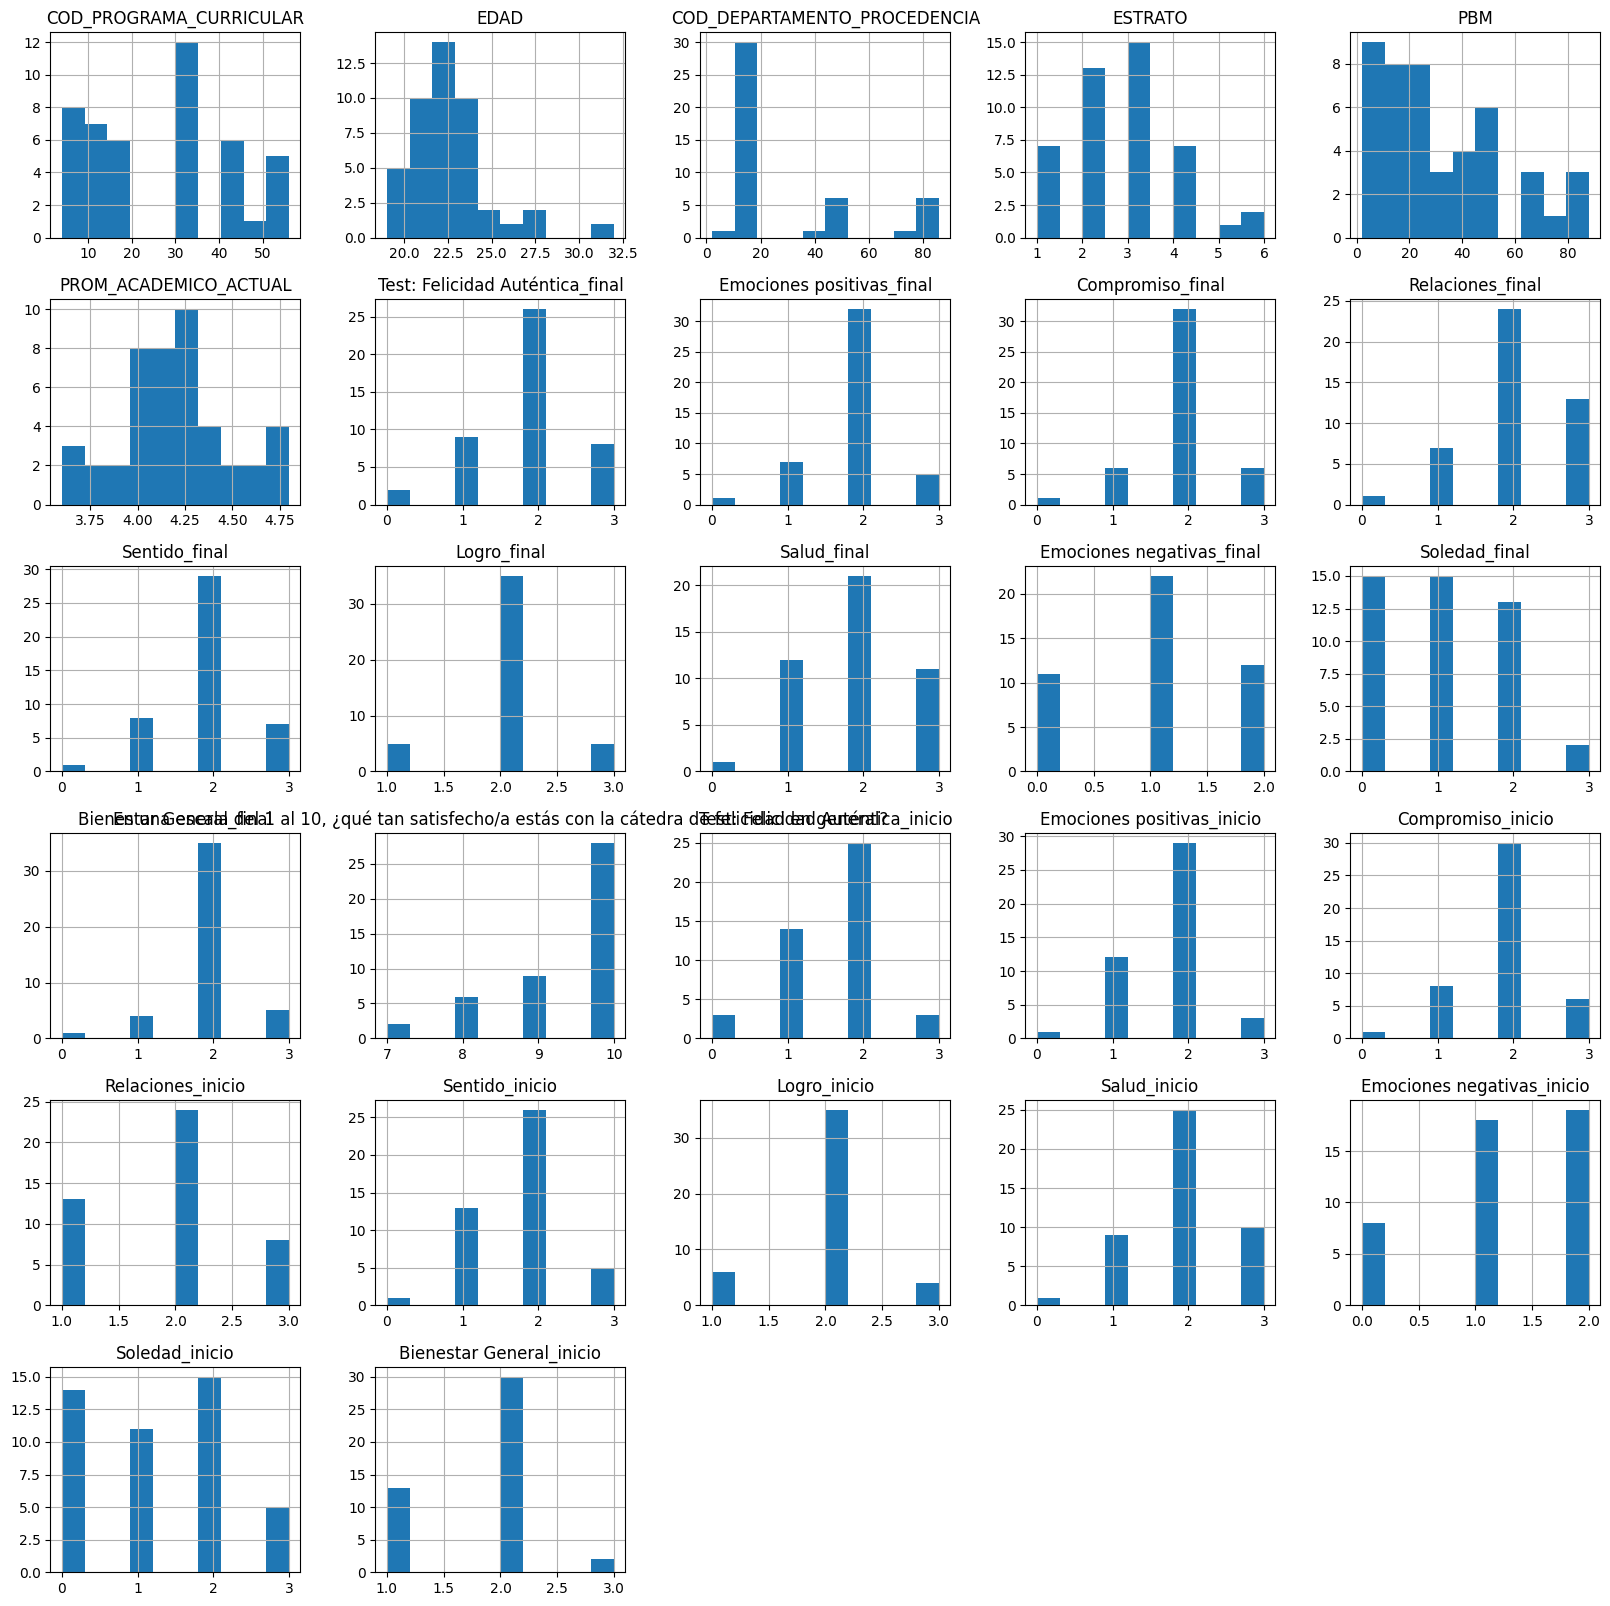

In [26]:
df_unificada.hist(figsize=(20,20))

*Nos enfocaremos en las funciones densidad de probabilidad de las siguientes columnas: Edad, Prom_acdemico_actual,Estrato,Pbm
para determinar las distribuciones de nuestra base de datos*

<ipython-input-27-dbea8b348266>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_unificada.PBM, color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30,ax = axs[0,0])
<ipython-input-27-dbea8b348266>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_unificada.EDAD, color='b',hist_kw

<Axes: xlabel='ESTRATO', ylabel='Density'>

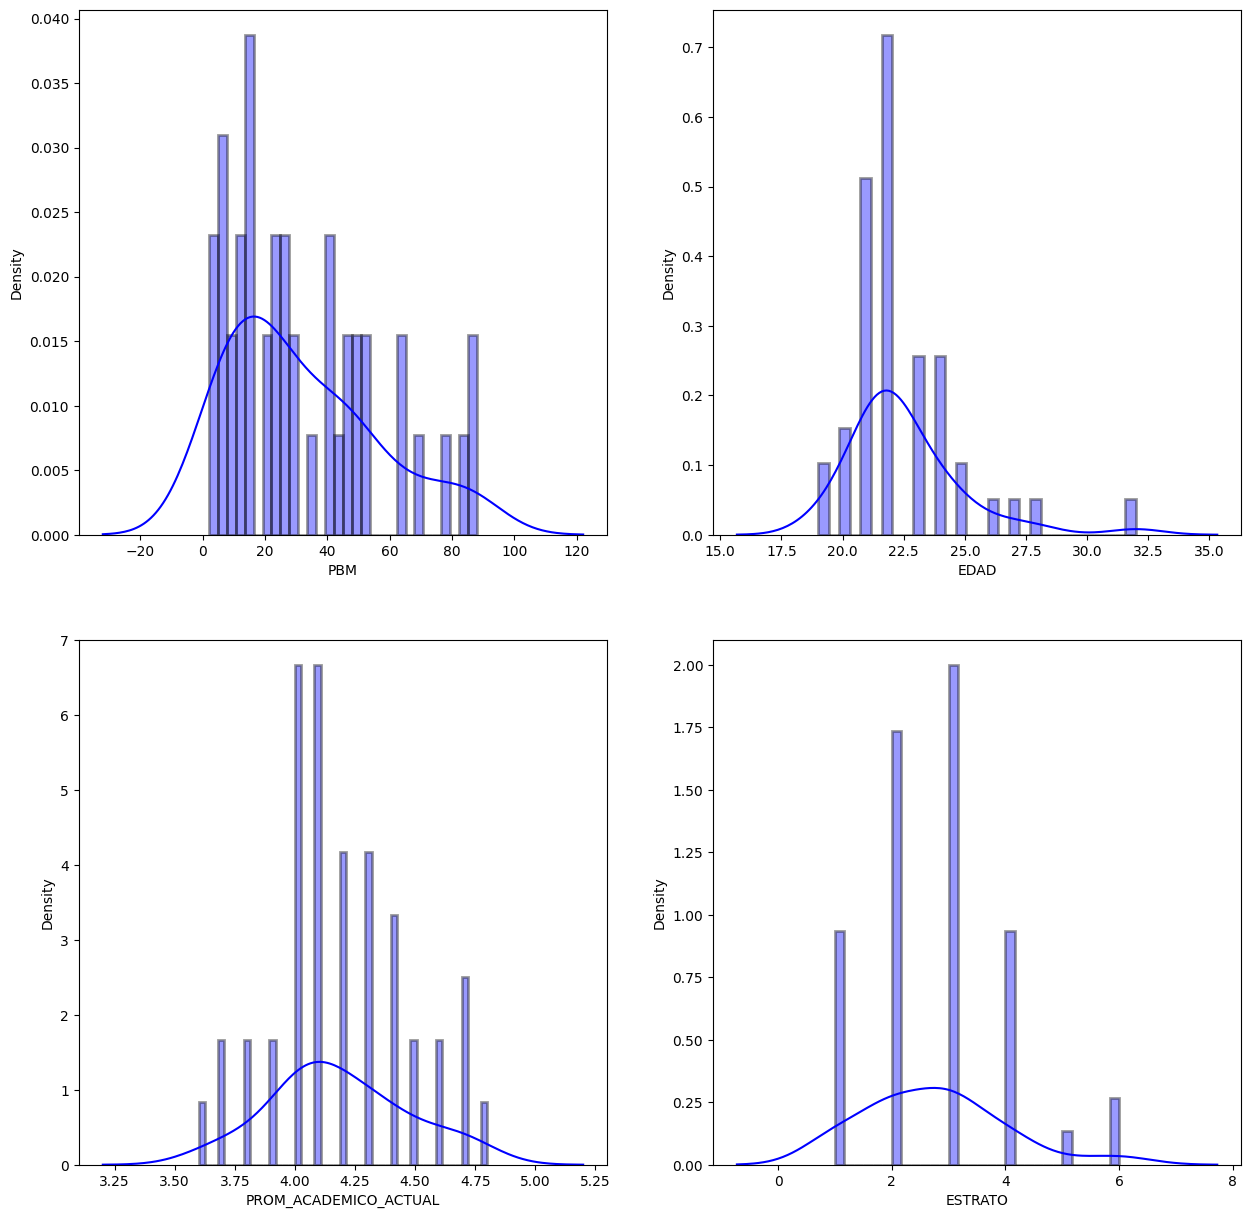

In [27]:
fig, axs = plt.subplots(2, 2 ,figsize=(15, 15))
sns.distplot(df_unificada.PBM, color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30,ax = axs[0,0])
sns.distplot(df_unificada.EDAD, color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30,ax = axs[0,1])
sns.distplot(df_unificada.PROM_ACADEMICO_ACTUAL, color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=45,ax = axs[1,0])
sns.distplot(df_unificada.ESTRATO, color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30,ax = axs[1,1])
# sns.distplot(df_unificada.COD_PROGRAMA_CURRICULAR, color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30,ax = axs[1,1])

*Estandarizamos los datos para poder obtener distribuciones normales con el fin de mejorar nuestro clustering*

In [28]:
#aplicamos la estandarizacion Standardscaler
scaler=StandardScaler()
columnas=['PBM','EDAD','PROM_ACADEMICO_ACTUAL','ESTRATO']
scaler.fit(df_unificada[columnas])
scale_unificada=pd.DataFrame(scaler.transform(df_unificada[columnas]),columns=df_unificada[columnas].columns)
scale_unificada.head()

,PBM,EDAD,PROM_ACADEMICO_ACTUAL,ESTRATO
0,-1.038352,-0.654212,0.047325,-0.601893
1,-1.121643,0.625768,-0.662548,-1.422657
2,-0.663546,0.199108,-1.727357,0.218870
3,-0.830127,-0.227552,-0.307612,-0.601893
4,-0.080514,-0.654212,-0.307612,-0.601893


<ipython-input-29-250ef5905715>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scale_unificada.PBM, color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30,ax = axs[0,0])
<ipython-input-29-250ef5905715>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scale_unificada.EDAD, color='b',h

<Axes: xlabel='ESTRATO', ylabel='Density'>

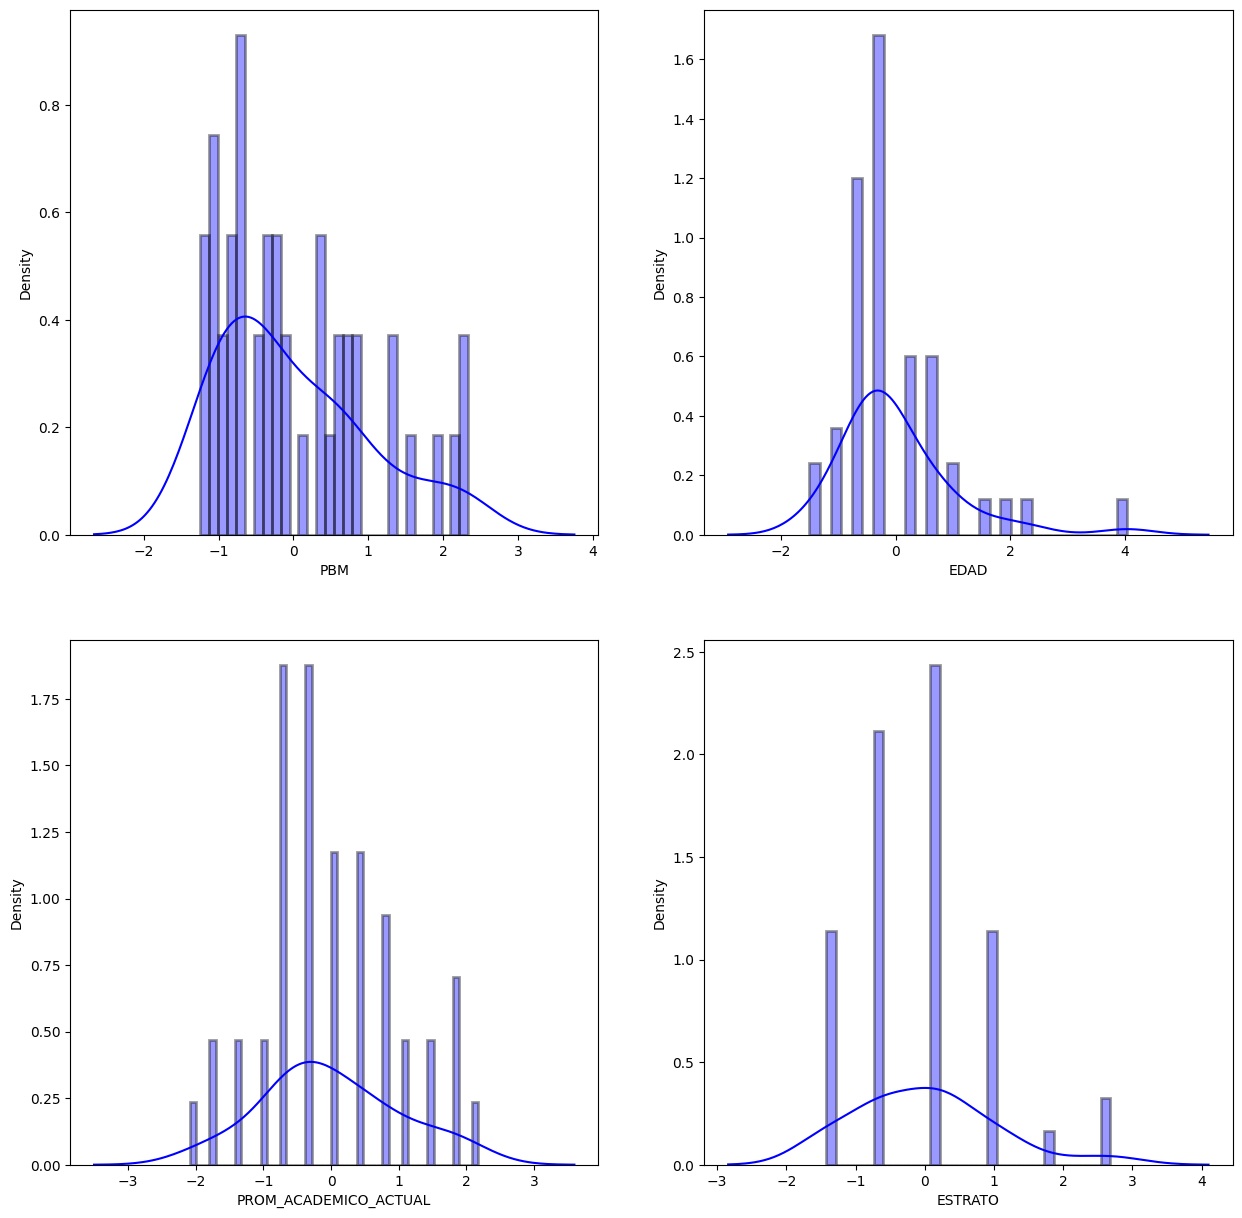

In [29]:
fig, axs = plt.subplots(2, 2 ,figsize=(15, 15))
sns.distplot(scale_unificada.PBM, color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30,ax = axs[0,0])
sns.distplot(scale_unificada.EDAD, color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30,ax = axs[0,1])
sns.distplot(scale_unificada.PROM_ACADEMICO_ACTUAL, color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=45,ax = axs[1,0])
sns.distplot(scale_unificada.ESTRATO, color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30,ax = axs[1,1])
# sns.distplot(scale_unificada.COD_PROGRAMA_CURRICULAR, color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30,ax = axs[1,1])

#*Clustering*#
*Con nuestra base de datos unificada y codificada procederemos a hacer el proceso de clustering con el fin de determinar agrupaciones dependiendo de la selección de columnas dentro de nuestra base de datos*

*Calculamos el numero de cluster que mejor se acomoda a nuestros datos*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

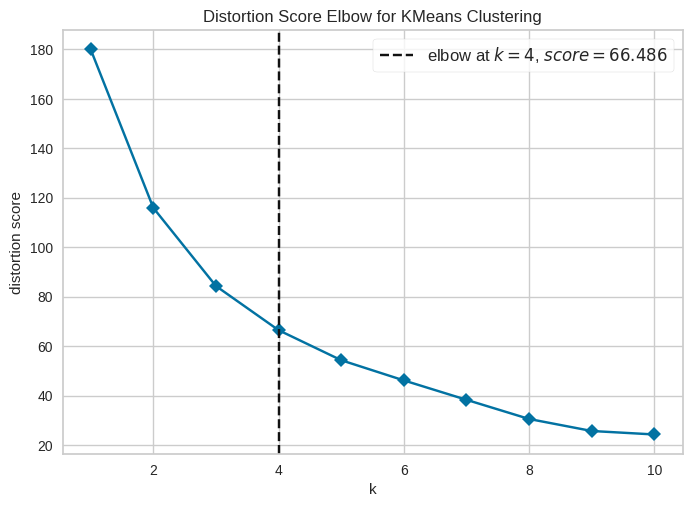

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11),timings=False)
visualizer.fit(scale_unificada)
visualizer.show()

*De la grafica anterior podemos observar que el numero de clusters que mejor se acomoda a los datos es 4, Procedemos a aplica KMeans con 4 clusters y agregamos la columna*

In [31]:
kmeans=KMeans(n_clusters=4)
y = kmeans.fit_predict(scale_unificada)
df_unificada['Cluster']=y
df_unificada_copy['Cluster']=y
print(df_unificada.Cluster.head())

1    0
2    1
0    3
3    0
4    0
Name: Cluster, dtype: int32


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##*Analisis de los clusters*##

*Procedemos a analizar cual es la informacion de estos nuevos clusters ('agrupaciones') y con esto podemos determinar concluciones sobre cada cluster*

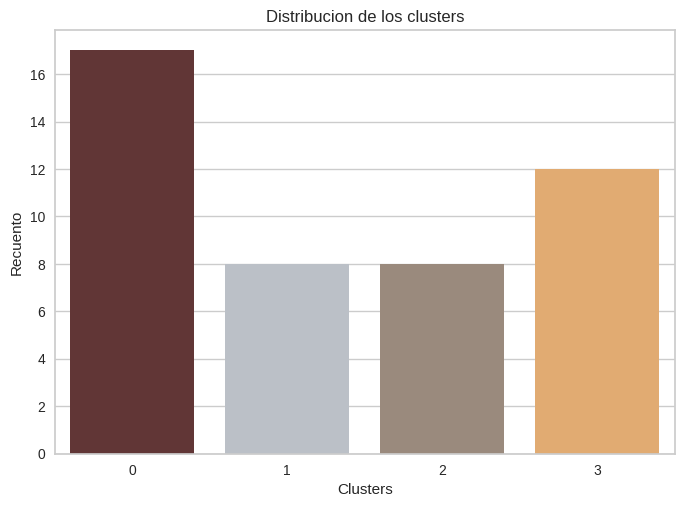

In [32]:
#Plotting recuento distribicion clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df_unificada["Cluster"], palette= pal)
pl.set_title("Distribucion de los clusters")
plt.ylabel('Recuento')
plt.xlabel('Clusters')
plt.show()

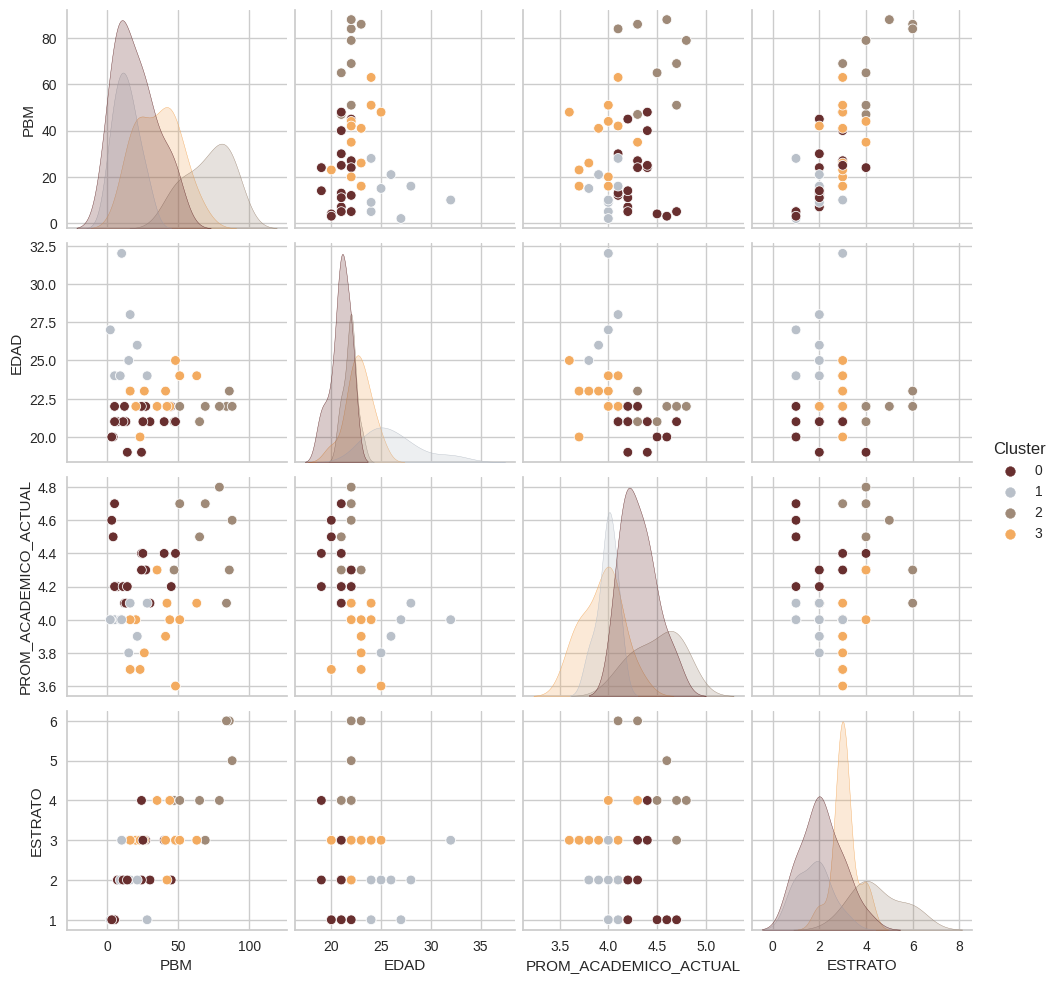

In [33]:
pl = sns.pairplot(data=df_unificada,hue='Cluster',vars=columnas,palette=pal)
plt.legend()
plt.show()

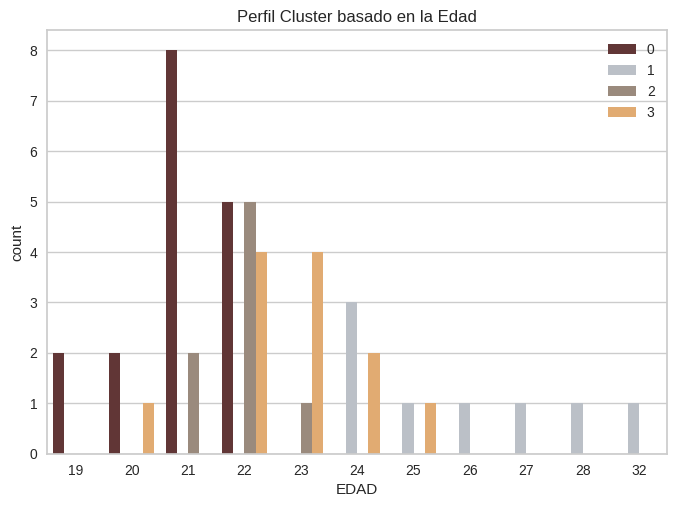

Cluster,0,1,2,3
count,17.000000,8.000000,8.00000,12.000000
mean,20.941176,26.250000,21.87500,22.750000
std,0.966345,2.764572,0.64087,1.288057
min,19.000000,24.000000,21.00000,20.000000
25%,21.000000,24.000000,21.75000,22.000000
50%,21.000000,25.500000,22.00000,23.000000
75%,22.000000,27.250000,22.00000,23.250000
max,22.000000,32.000000,23.00000,25.000000


In [34]:
pl = sns.countplot(hue=df_unificada["Cluster"],x=df_unificada["EDAD"], palette= pal)
pl.set_title("Perfil Cluster basado en la Edad")
plt.legend()
plt.show()
df_unificada['EDAD'].groupby(df_unificada["Cluster"]).describe().T

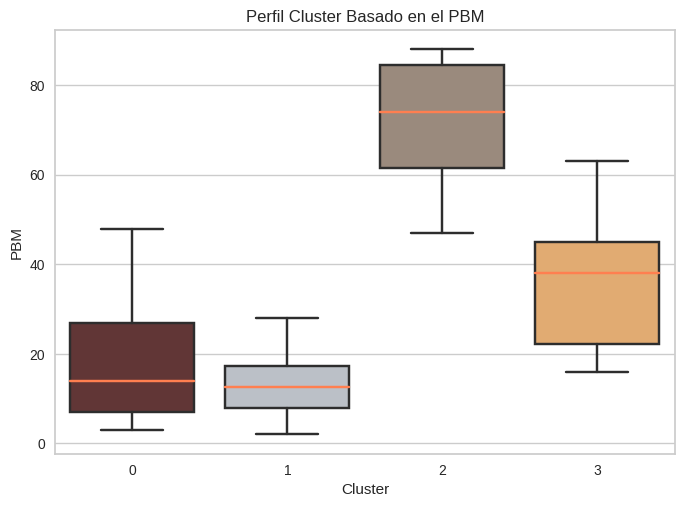

Cluster,0,1,2,3
count,17.000000,8.000000,8.000000,12.000000
mean,19.823529,13.250000,71.125000,35.416667
std,14.595527,8.548183,15.869445,15.210393
min,3.000000,2.000000,47.000000,16.000000
25%,7.000000,8.000000,61.500000,22.250000
50%,14.000000,12.500000,74.000000,38.000000
75%,27.000000,17.250000,84.500000,45.000000
max,48.000000,28.000000,88.000000,63.000000


In [35]:
pl = sns.boxplot(y=df_unificada["PBM"],x=df_unificada["Cluster"], palette= pal,medianprops={"color": "coral"})
pl.set_title("Perfil Cluster Basado en el PBM")
plt.legend()
plt.show()
df_unificada['PBM'].groupby(df_unificada["Cluster"]).describe().T

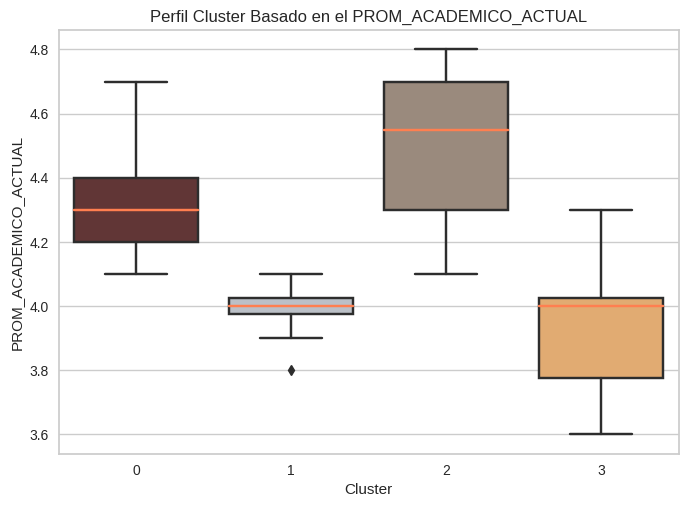

Cluster,0,1,2,3
count,17.000000,8.000000,8.000000,12.000000
mean,4.311765,3.987500,4.500000,3.933333
std,0.176360,0.099103,0.244949,0.201509
min,4.100000,3.800000,4.100000,3.600000
25%,4.200000,3.975000,4.300000,3.775000
50%,4.300000,4.000000,4.550000,4.000000
75%,4.400000,4.025000,4.700000,4.025000
max,4.700000,4.100000,4.800000,4.300000


In [36]:
pl = sns.boxplot(y=df_unificada["PROM_ACADEMICO_ACTUAL"],x=df_unificada["Cluster"], palette= pal,medianprops={"color": "coral"})
pl.set_title("Perfil Cluster Basado en el PROM_ACADEMICO_ACTUAL")
plt.legend()
plt.show()
df_unificada['PROM_ACADEMICO_ACTUAL'].groupby(df_unificada["Cluster"]).describe().T

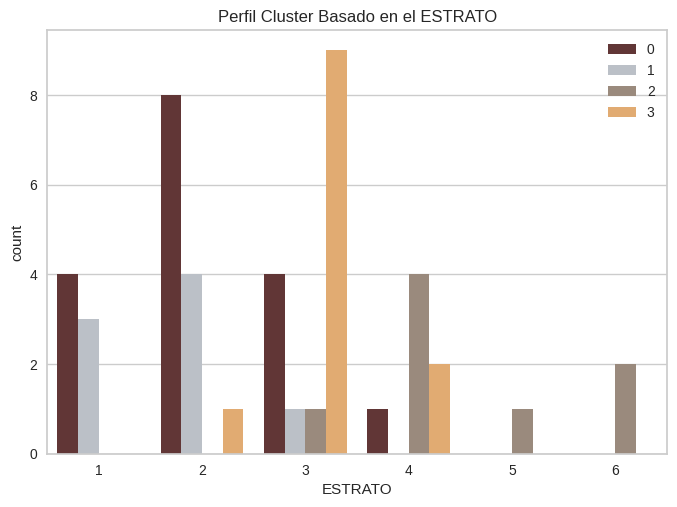

Cluster,0,1,2,3
count,17.000000,8.000000,8.000000,12.000000
mean,2.117647,1.750000,4.500000,3.083333
std,0.857493,0.707107,1.069045,0.514929
min,1.000000,1.000000,3.000000,2.000000
25%,2.000000,1.000000,4.000000,3.000000
50%,2.000000,2.000000,4.000000,3.000000
75%,3.000000,2.000000,5.250000,3.000000
max,4.000000,3.000000,6.000000,4.000000


In [37]:
pl = sns.countplot(x=df_unificada["ESTRATO"],hue=df_unificada["Cluster"], palette= pal)
pl.set_title("Perfil Cluster Basado en el ESTRATO")
plt.legend()
plt.show()
df_unificada['ESTRATO'].groupby(df_unificada["Cluster"]).describe().T

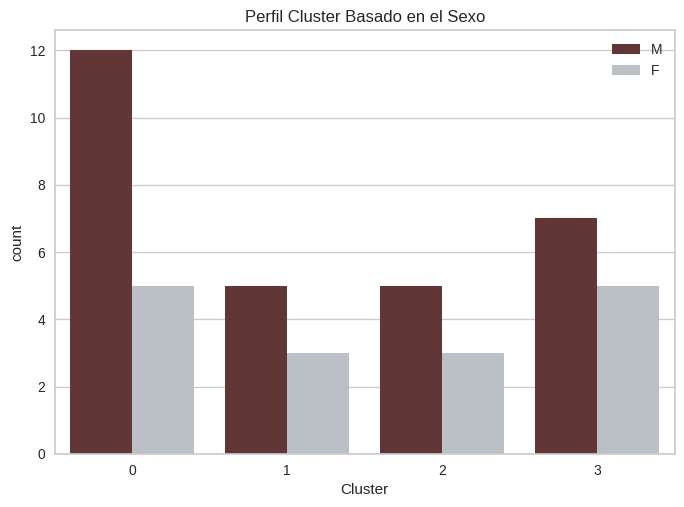

In [38]:
pl = sns.countplot(x=df_unificada["Cluster"],hue=df_unificada["SEXO_LEGAL"], palette= pal)
pl.set_title("Perfil Cluster Basado en el Sexo")
plt.legend()
plt.show()
# df_unificada['PRIV'].groupby(df_unificada["Cluster"]).describe().T

*Por medio de las anteriores graficas podemos obtener las siguientes
conclusiones acerca de la información que contiene nuestros clusters sobre los estudiantes de la catedra:*



*   ***Cluster*** 0 --> ***Años*** (19-22 años) , ***PBM*** (3-48) , ***Promedio*** (4.1-4.7) , ***Estrato*** (1-4) , ***Masculino-Femenino*** (70.58%-29.41%)
---
*   ***Cluster*** 1 --> ***Años*** (24-32 años) , ***PBM*** (2-28) , ***Promedio*** (3.8-4.1) , ***Estrato*** (1-3) , ***Masculino-Femenino*** (62.5%-38.5%)
---
*   ***Cluster*** 2 --> ***Años*** (21-23 años) , ***PBM*** (47-88) , ***Promedio*** (4.1-4.8) , ***Estrato*** (3-6) , ***Masculino-Femenino*** (62.5%-38.5%)
---
*   ***Cluster*** 3 --> ***Años*** (20-25 años) , ***PBM*** (16-63) , ***Promedio*** (3.6-4.3) , ***Estrato*** (2-4) , ***Masculino-Femenino*** (58.33%-41.67%)
---





#*Analisis de los clusters en comparacion a los tests iniciales/finales de la catedra de felicidad*#


*Como siguiente punto importante del analisis miraremos cuales fueron los resultados de los clusters o agrupaciones en la evaluciones aplicadas al inicio y al final de la catedra ademas haremos un contraste entre ambos resultados para inferir concluciones*

##*Test: Felicidad Auténtica*##

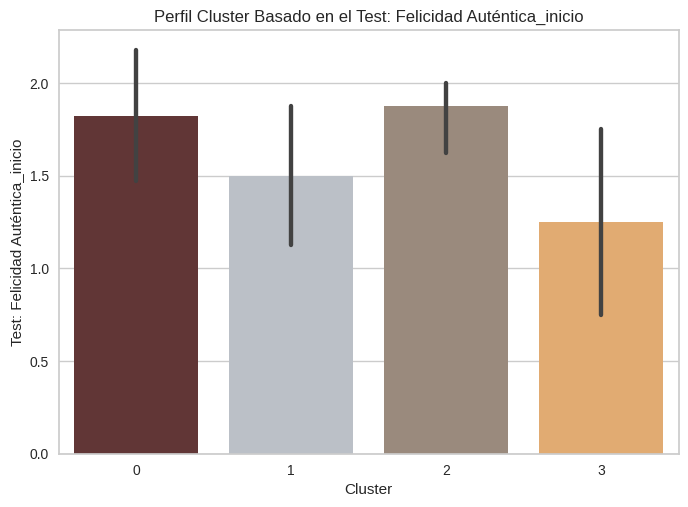

Cluster,0,1,2,3
min,1.000000,1.000000,1.000000,0.000000
mean,1.823529,1.500000,1.875000,1.250000
std,0.727607,0.534522,0.353553,0.866025
max,3.000000,2.000000,2.000000,2.000000


In [39]:
pl = sns.barplot(y=df_unificada["Test: Felicidad Auténtica_inicio"],x=df_unificada["Cluster"], palette= pal)
pl.set_title("Perfil Cluster Basado en el Test: Felicidad Auténtica_inicio")
plt.legend()
plt.show()
df_unificada['Test: Felicidad Auténtica_inicio'].groupby(df_unificada["Cluster"]).describe().T.loc[['min','mean', 'std','max']]

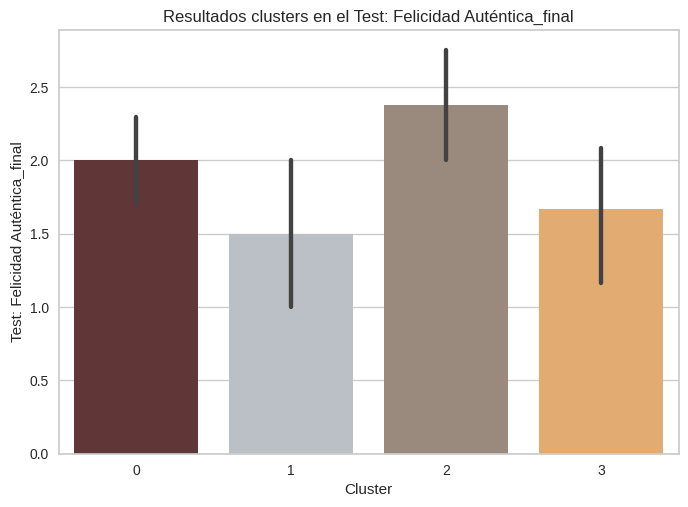

Cluster,0,1,2,3
min,1.000000,0.000000,2.000000,0.000000
mean,2.000000,1.500000,2.375000,1.666667
std,0.612372,0.755929,0.517549,0.887625
max,3.000000,2.000000,3.000000,3.000000


In [40]:
pl = sns.barplot(y=df_unificada["Test: Felicidad Auténtica_final"],x=df_unificada["Cluster"], palette= pal)
pl.set_title("Resultados clusters en el Test: Felicidad Auténtica_final")
plt.legend()
plt.show()
df_unificada['Test: Felicidad Auténtica_final'].groupby(df_unificada["Cluster"]).describe().T.loc[['min','mean', 'std','max']]

##Pruebas (Iniciales/finales)##
*Emociones_positivas   ,                                                        Compromiso          ,                                                           Relaciones       ,                                                        Sentido        ,                                                          Logro         ,                                                           Salud          ,                                                          Emociones_negativas,
Soledad,
Bienestar General*

Estadistica Descriptiva de Emociones positivas_inicio
Cluster         0         1         2         3
min      1.000000  0.000000  1.000000  1.000000
mean     1.882353  1.500000  1.750000  1.750000
std      0.485071  0.755929  0.707107  0.621582
max      3.000000  2.000000  3.000000  3.000000
Estadistica Descriptiva de Emociones positivas_final
Cluster         0         1        2         3
min      1.000000  0.000000  2.00000  1.000000
mean     2.000000  1.625000  2.25000  1.750000
std      0.612372  0.744024  0.46291  0.452267
max      3.000000  2.000000  3.00000  2.000000
Tabla 0
-----------------------------------------------------------------------------------------------------
Estadistica Descriptiva de Compromiso_inicio
Cluster    0         1        2         3
min      1.0  0.000000  1.00000  1.000000
mean     2.0  1.750000  2.12500  1.750000
std      0.5  0.886405  0.64087  0.621582
max      3.0  3.000000  3.00000  3.000000
Estadistica Descriptiva de Compromiso_final
Cluster  

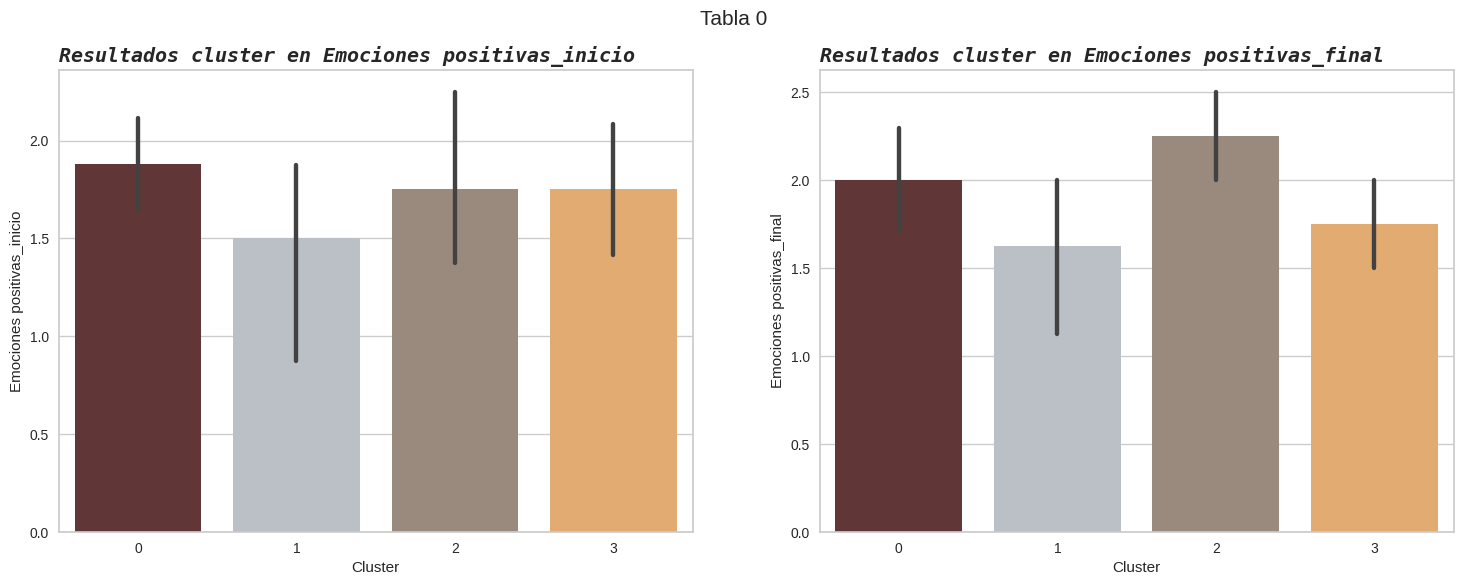

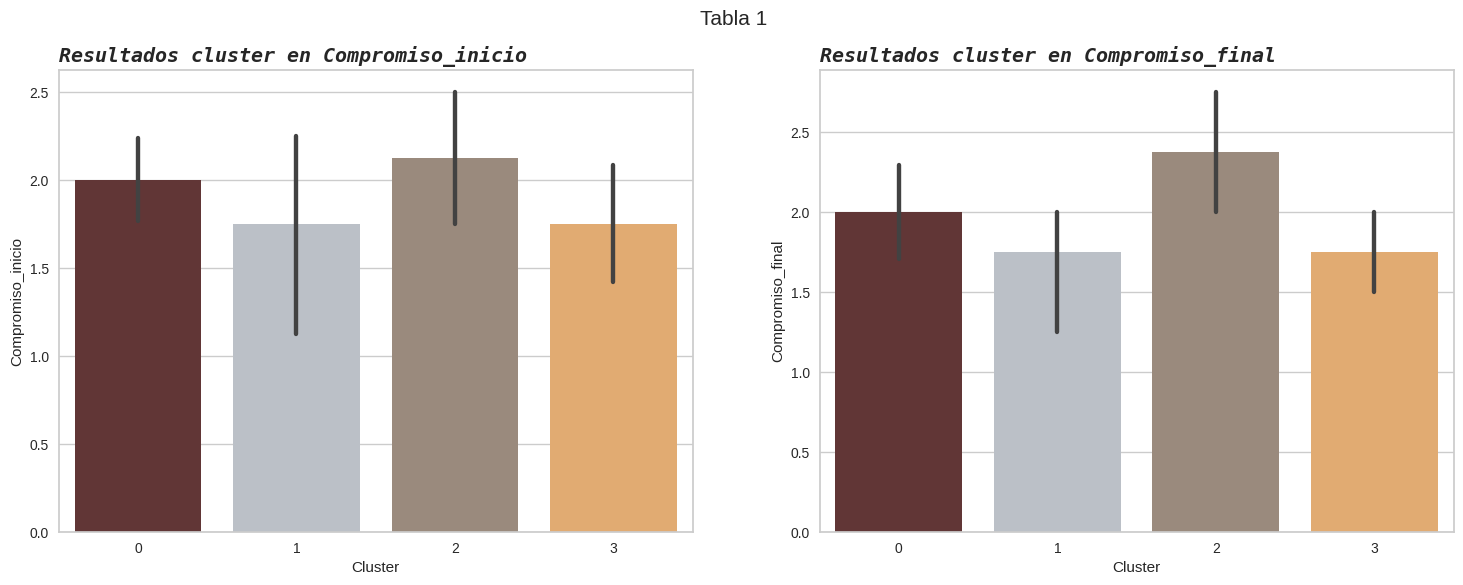

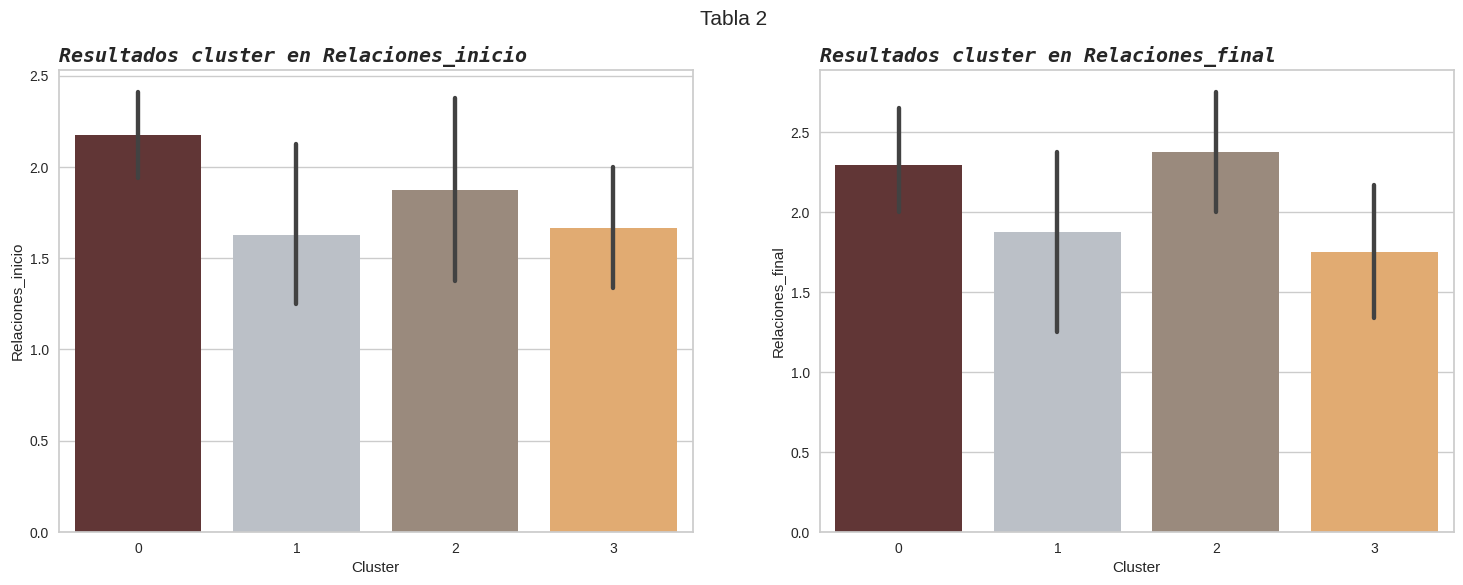

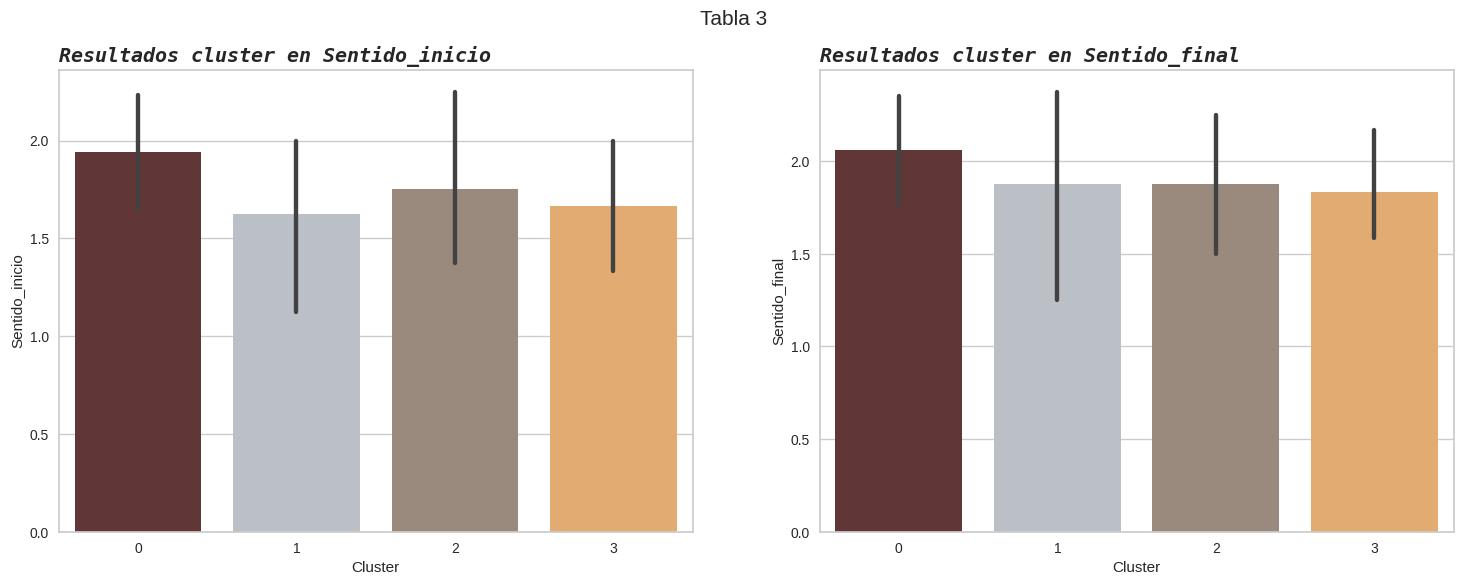

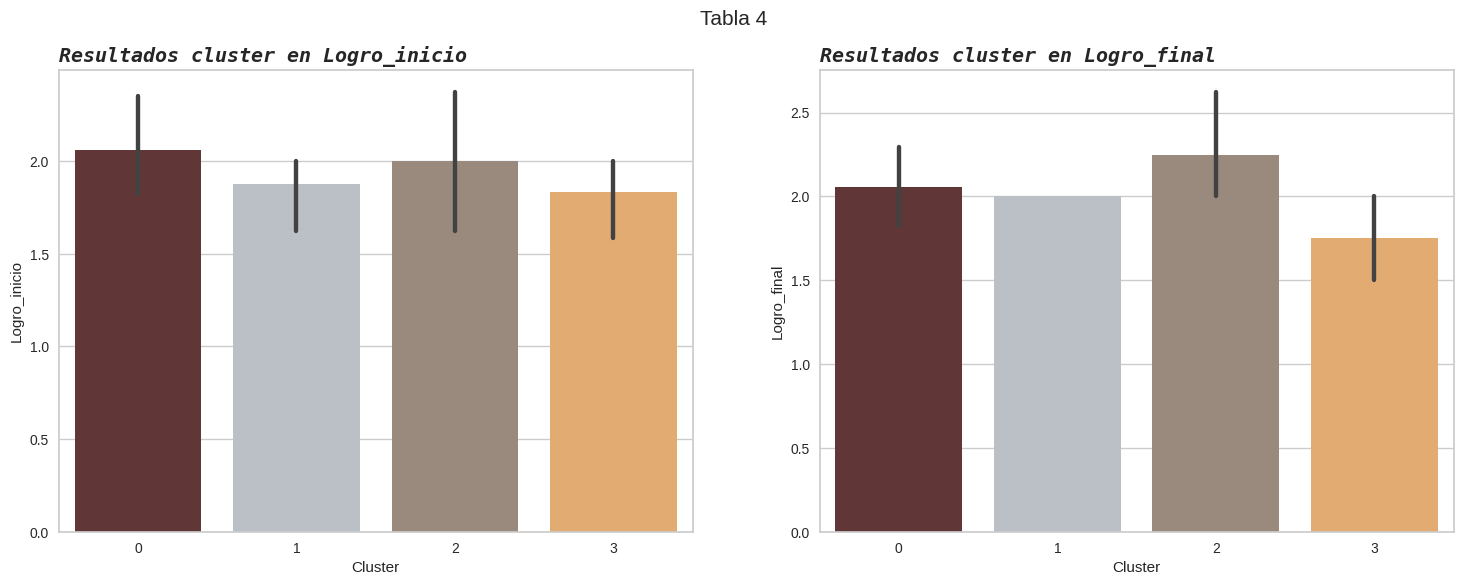

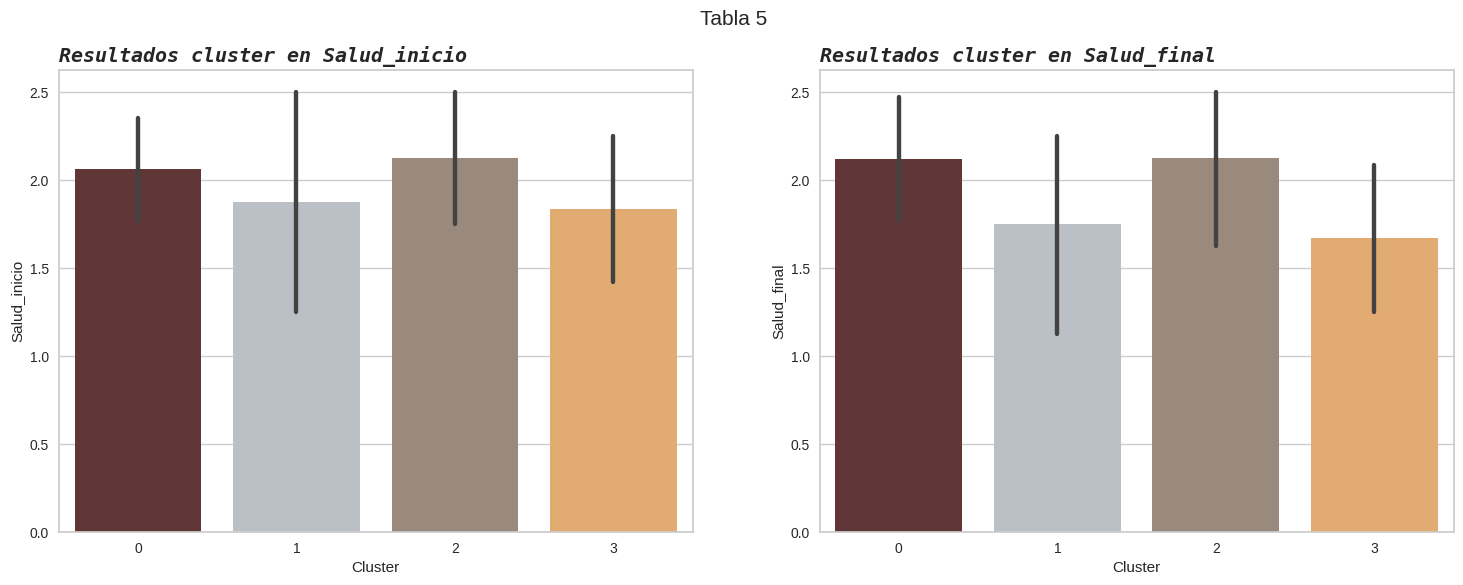

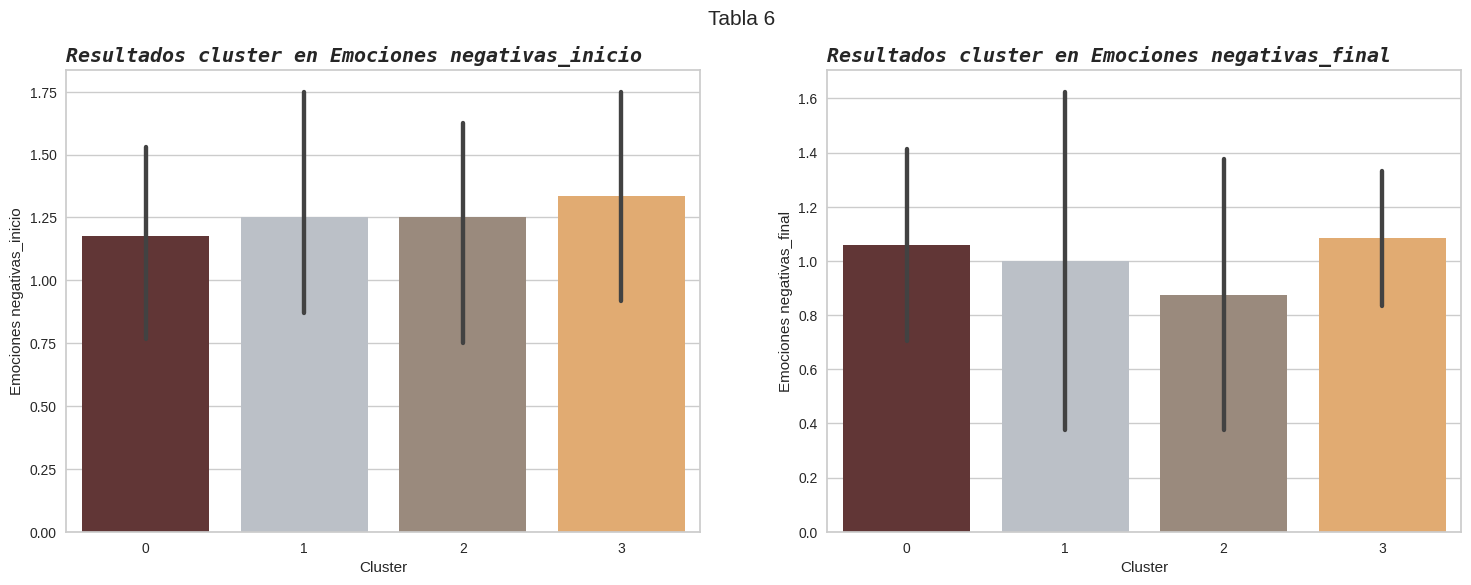

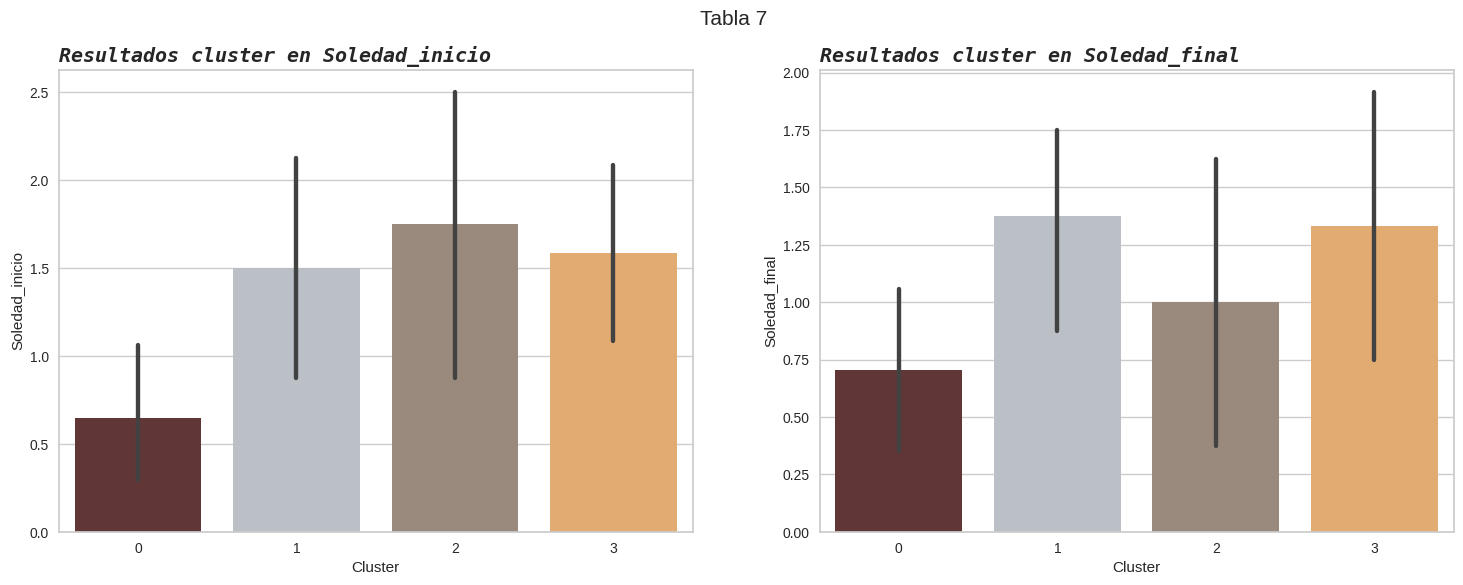

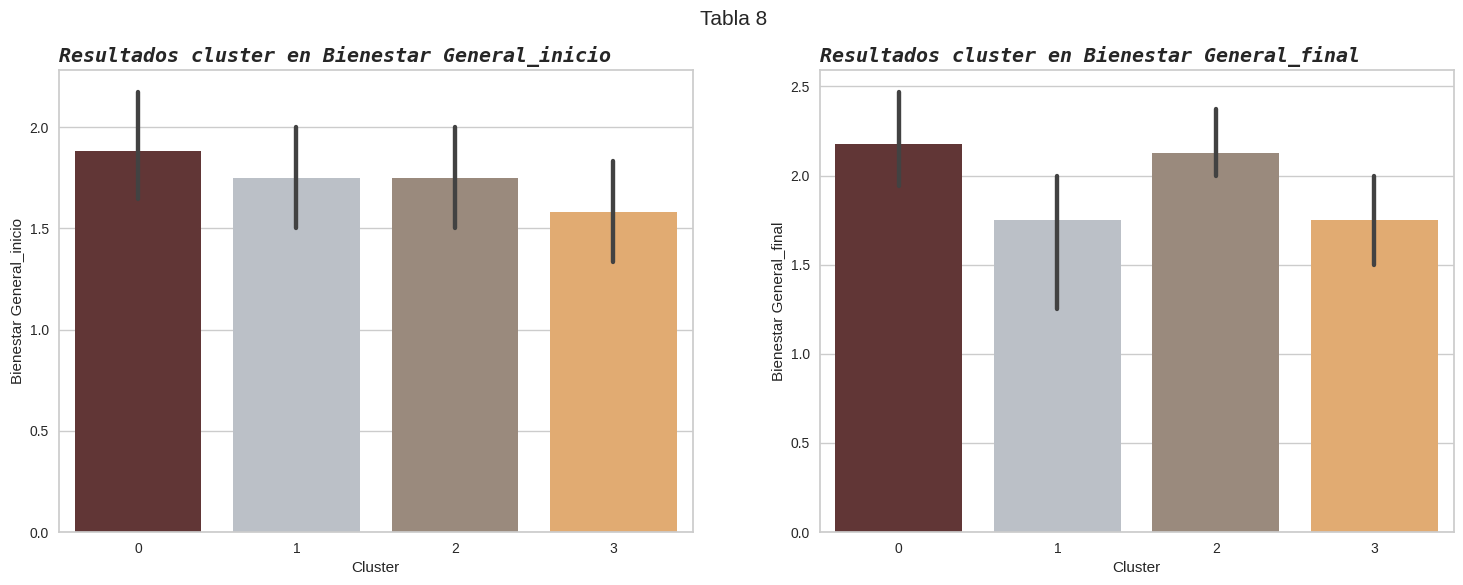

In [41]:
data=df_unificada.iloc[:,20:29]
for r,i in enumerate(data.columns):
  fig, ax =plt.subplots(1,2,figsize=(18,6))
  pl = sns.barplot(y=df_unificada[i],x=df_unificada["Cluster"], palette= pal,ax=ax[0])
  pl.set_title(f"Resultados cluster en {i} ",    fontsize='large',
    loc='left',
    fontweight='bold',
    style='italic',
    family='monospace')
  print(f'Estadistica Descriptiva de {i}')
  print(df_unificada[i].groupby(df_unificada["Cluster"]).describe().T.loc[['min','mean', 'std','max']])
  i=i.replace('_inicio','_final')
  pl = sns.barplot(y=df_unificada[i],x=df_unificada["Cluster"], palette= pal,ax=ax[1])
  pl.set_title(f"Resultados cluster en {i}",fontsize='large',
    loc='left',
    fontweight='bold',
    style='italic',
    family='monospace')
  fig.show()
  print(f'Estadistica Descriptiva de {i}')
  print(df_unificada[i].groupby(df_unificada["Cluster"]).describe().T.loc[['min','mean', 'std','max']])
  print(f'Tabla {r}')
  fig.suptitle(f'Tabla {r}', fontsize=15,)
  print('-----------------------------------------------------------------------------------------------------')

##Test satisfaccion con la catedra##

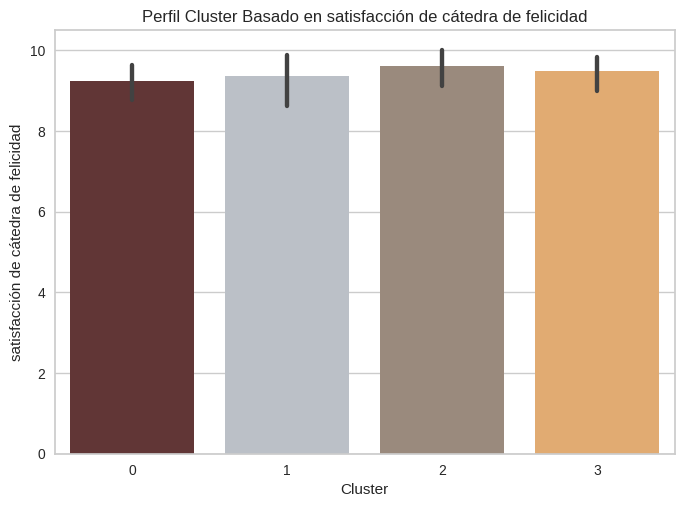

Cluster,0,1,2,3
min,7.000000,7.00000,8.000000,8.000000
mean,9.235294,9.37500,9.625000,9.500000
std,0.970143,1.06066,0.744024,0.797724
max,10.000000,10.00000,10.000000,10.000000


In [49]:
pl = sns.barplot(y=df_unificada["En una escala del 1 al 10, ¿qué tan satisfecho/a estás con la cátedra de felicidad en general?"],x=df_unificada["Cluster"], palette= pal)
pl.set_title("Perfil Cluster Basado en satisfacción de cátedra de felicidad")
plt.ylabel('satisfacción de cátedra de felicidad')
plt.legend()
plt.show()
df_unificada['En una escala del 1 al 10, ¿qué tan satisfecho/a estás con la cátedra de felicidad en general?'].groupby(df_unificada["Cluster"]).describe().T.loc[['min','mean', 'std','max']]

In [42]:
df_unificada.to_excel('base.xlsx')